<a href="https://colab.research.google.com/github/janerysn/J-Data-Science/blob/main/J_Deteksi_Dini_Autisme_Spectrum_Disorder_(ASD)_pada_Balita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Sistem Kecerdasan Bisnis |
Deteksi Dini Autisme Spectrum Disorder (ASD) pada Balita**<br>

Our team members :
1. Zahra Jane Arnecia
2. Husein Zidan
3. Dwy Laila Safitry
4. Noviana Rosianti
5. Erin Divayaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from IPython.display import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Autism Dataset for Toddlers.csv')

In [ ]:
df = df[(df['Who completed the test'] != 'Self') & (df['Who completed the test'] != 'Others')]
df = df.reset_index(drop=True)
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1043,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1044,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1045,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [ ]:
df = df.rename(columns={'Who completed the test': 'Who_completed_the_test', 'Class/ASD Traits ': 'ASD Traits'})

In [ ]:
df.isna().sum()

,0
Case_No,0
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1047 non-null   int64 
 1   A1                      1047 non-null   int64 
 2   A2                      1047 non-null   int64 
 3   A3                      1047 non-null   int64 
 4   A4                      1047 non-null   int64 
 5   A5                      1047 non-null   int64 
 6   A6                      1047 non-null   int64 
 7   A7                      1047 non-null   int64 
 8   A8                      1047 non-null   int64 
 9   A9                      1047 non-null   int64 
 10  A10                     1047 non-null   int64 
 11  Age_Mons                1047 non-null   int64 
 12  Qchat-10-Score          1047 non-null   int64 
 13  Sex                     1047 non-null   object
 14  Ethnicity               1047 non-null   object
 15  Jaun

In [ ]:
df_eda = df.copy()

In [ ]:
cols = ['Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD Traits']
le = LabelEncoder()

for col in cols:
  df[col] = le.fit_transform(df[col])
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,0,8,1,0,2,0
1,2,1,1,0,0,0,1,1,0,0,0,36,4,1,5,1,0,2,1
2,3,1,0,0,0,0,0,1,1,0,1,36,4,1,8,1,0,2,1
3,4,1,1,1,1,1,1,1,1,1,1,24,10,1,0,0,0,2,1
4,5,1,1,0,1,1,1,1,1,1,1,20,9,0,5,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,1050,0,0,0,0,0,0,0,0,0,1,24,1,0,5,0,1,2,0
1043,1051,0,0,1,1,1,0,1,0,1,0,12,5,1,7,1,0,2,1
1044,1052,1,0,1,1,1,1,1,1,1,1,18,9,1,8,1,0,2,1
1045,1053,1,0,0,0,0,0,0,1,0,1,19,3,1,5,0,1,2,0


<Axes: >

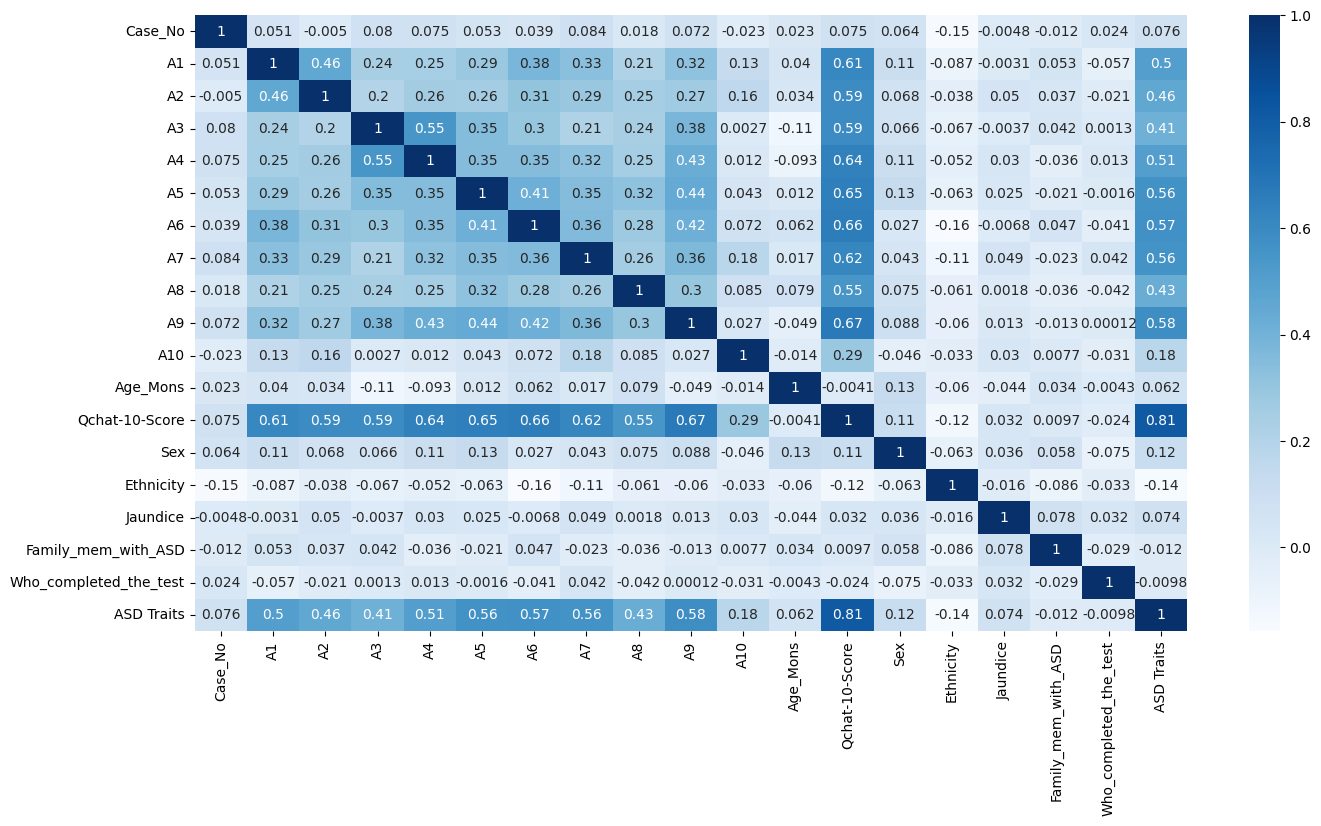

In [ ]:
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

#EDA

In [ ]:
df_eda

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1043,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1044,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1045,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [ ]:
df_eda['A1'] = df_eda['A1'].replace({0: 'Selalu/Biasanya', 1: 'Kadang-kadang/Jarang/Tidak Pernah'})
df_eda['A2'] = df_eda['A2'].replace({0: 'Sangat Mudah/Cukup Mudah', 1: 'Cukup Sulit/Sulit/Sangat Sulit'})
df_eda['A3'] = df_eda['A3'].replace({0: 'Selalu/Biasanya', 1: 'Kadang-kadang/Jarang/Tidak Pernah'})
df_eda['A4'] = df_eda['A4'].replace({0: 'Selalu/Biasanya', 1: 'Kadang-kadang/Jarang/Tidak Pernah'})
df_eda['A5'] = df_eda['A5'].replace({0: 'Selalu/Biasanya', 1: 'Kadang-kadang/Jarang/Tidak Pernah'})
df_eda['A6'] = df_eda['A6'].replace({0: 'Selalu/Biasanya', 1: 'Kadang-kadang/Jarang/Tidak Pernah'})
df_eda['A7'] = df_eda['A7'].replace({0: 'Selalu/Biasanya', 1: 'Kadang-kadang/Jarang/Tidak Pernah'})
df_eda['A8'] = df_eda['A8'].replace({0: 'Sangat Biasa/Cukup Biasa', 1: 'Sedikit Tidak Biasa/Sangat Tidak Biasa/Tidak Biasa'})
df_eda['A9'] = df_eda['A9'].replace({0: 'Selalu/Biasanya', 1: 'Kadang-kadang/Jarang/Tidak Pernah'})
df_eda['A10'] = df_eda['A10'].replace({0: 'Jarang/Tidak Pernah', 1: 'Selalu/Biasanya/Kadang-kadang'})
df_eda['Sex'] = df_eda['Sex'].replace({'f': 'Female', 'm': 'Male'})
df_eda['Family_mem_with_ASD'] = df_eda['Family_mem_with_ASD'].replace({'no': 'No', 'yes': 'Yes'})
df_eda['Jaundice'] = df_eda['Jaundice'].replace({'no': 'No', 'yes': 'Yes'})

In [ ]:
palette = {"No" : "#F6EFBD",
           "Male" : "#F6EFBD",
           "Selalu/Biasanya" : "#F6EFBD",
           "Sangat Mudah/Cukup Mudah" : "#F6EFBD",
           "Jarang/Tidak Pernah" : "#F6EFBD",
           "Sangat Biasa/Cukup Biasa" : "#F6EFBD",
           "Kadang-kadang/Jarang/Tidak Pernah": "#C96868",
           "Selalu/Biasanya/Kadang-kadang": "#C96868",
           "Cukup Sulit/Sulit/Sangat Sulit": "#C96868",
           "Sedikit Tidak Biasa/Sangat Tidak Biasa/Tidak Biasa": "#C96868",
           "Yes": "#C96868",
           "Female": "#C96868"}

In [ ]:
palettes = ["#F6EFBD", "#C96868"]

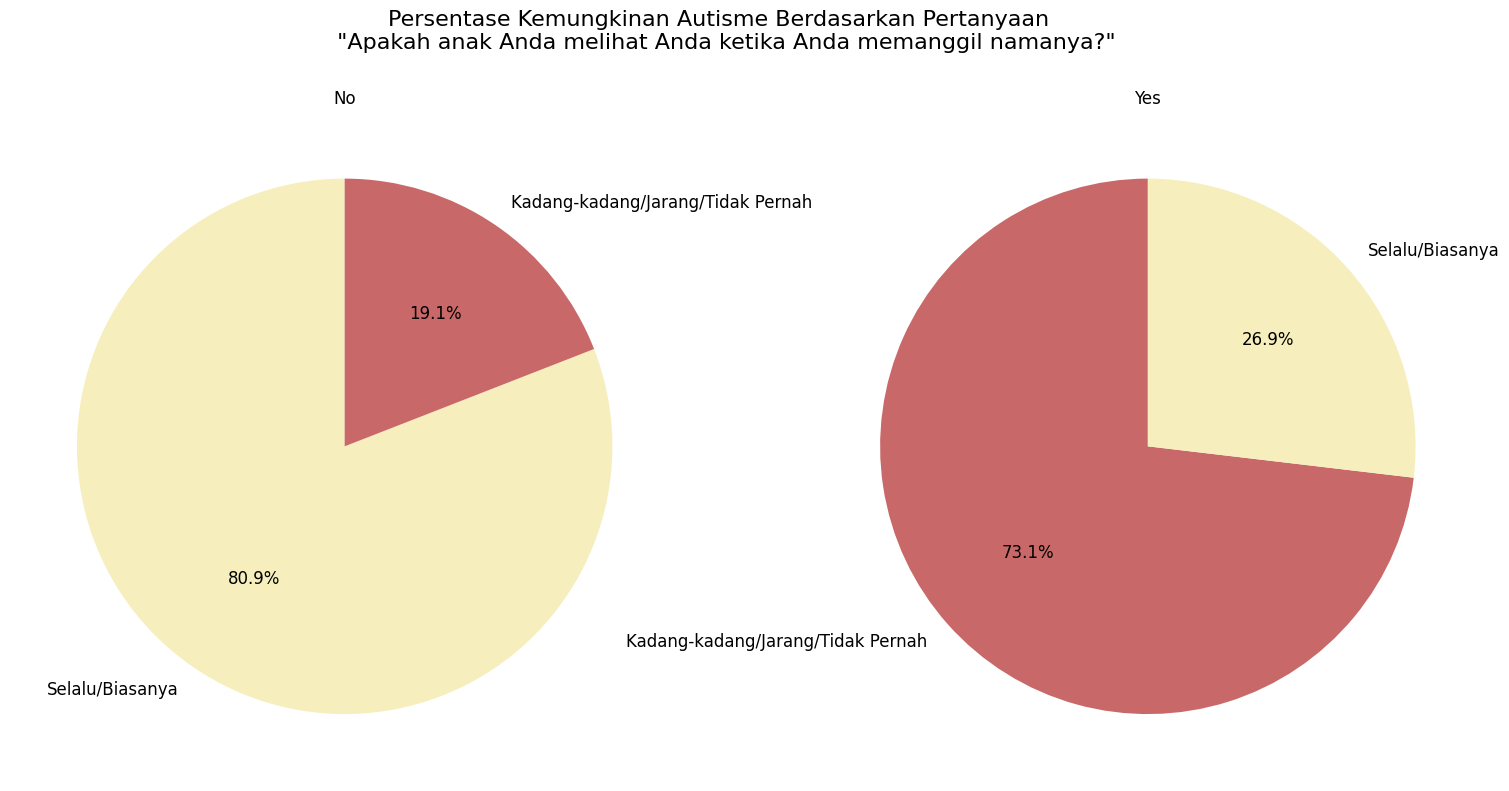

In [ ]:
asd_no = df_eda[df_eda['ASD Traits'] == 'No']['A1'].value_counts(normalize=True) * 100
asd_yes = df_eda[df_eda['ASD Traits'] == 'Yes']['A1'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(19, 9))

axs[0].pie(asd_no, labels=asd_no.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[0].set_title('No', fontsize=12)
for label in axs[0].texts:
    label.set_fontsize(12)

axs[1].pie(asd_yes, labels=asd_yes.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_yes.index], startangle=90)
axs[1].set_title('Yes', fontsize=12)
for label in axs[1].texts:
    label.set_fontsize(12)

plt.suptitle('Persentase Kemungkinan Autisme Berdasarkan Pertanyaan \n "Apakah anak Anda melihat Anda ketika Anda memanggil namanya?"', fontsize=16)
plt.show()

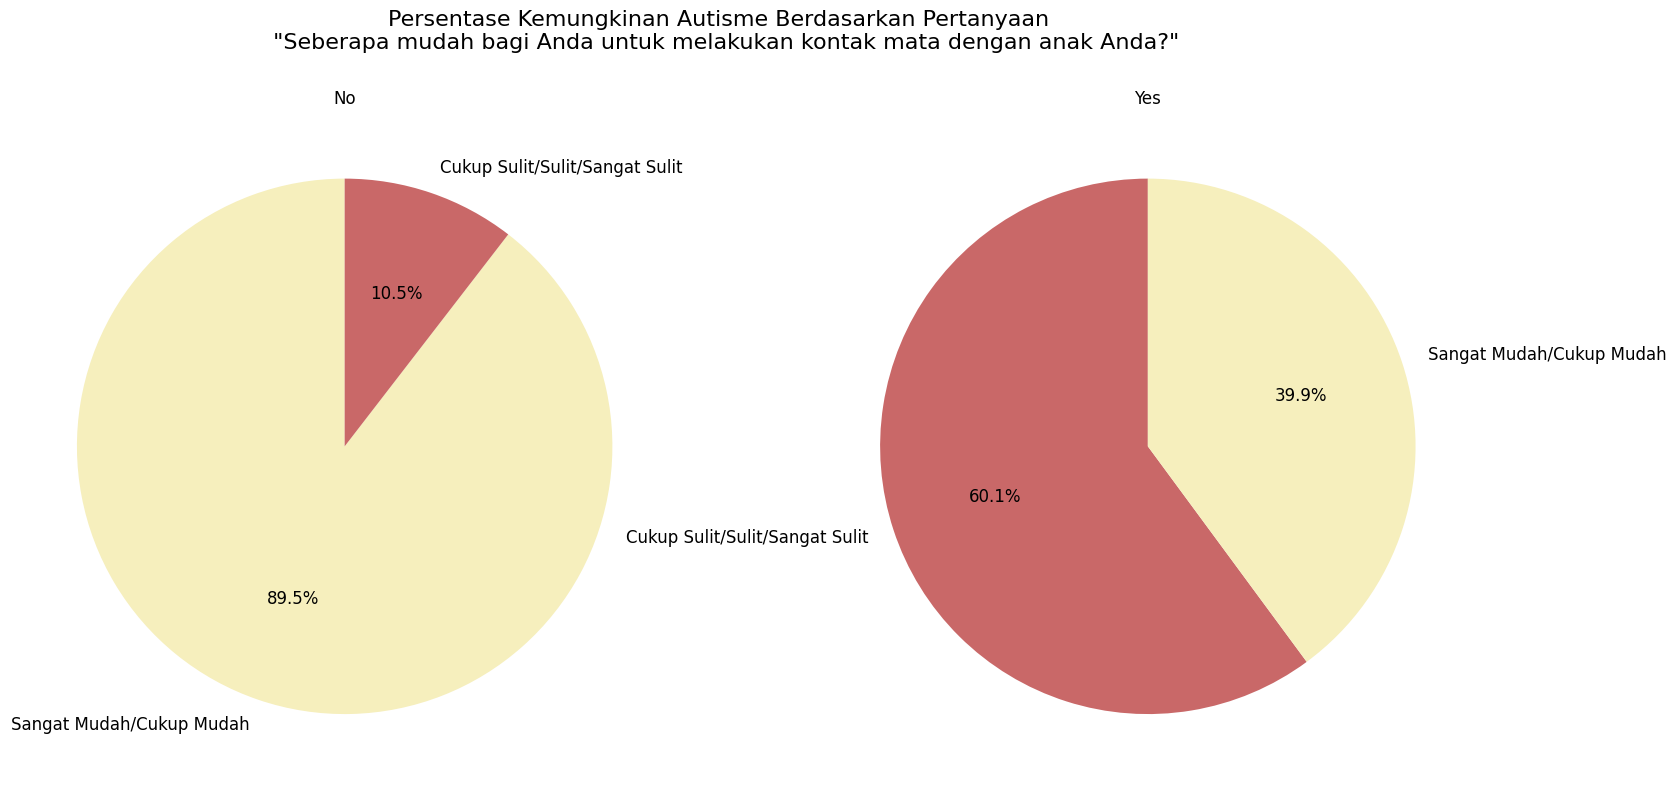

In [ ]:
asd_no = df_eda[df_eda['ASD Traits'] == 'No']['A2'].value_counts(normalize=True) * 100
asd_yes = df_eda[df_eda['ASD Traits'] == 'Yes']['A2'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(19, 9))

axs[0].pie(asd_no, labels=asd_no.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[0].set_title('No', fontsize=12)
for label in axs[0].texts:
    label.set_fontsize(12)


axs[1].pie(asd_yes, labels=asd_yes.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_yes.index], startangle=90)
axs[1].set_title('Yes', fontsize=12)
for label in axs[1].texts:
    label.set_fontsize(12)

plt.suptitle('Persentase Kemungkinan Autisme Berdasarkan Pertanyaan \n "Seberapa mudah bagi Anda untuk melakukan kontak mata dengan anak Anda?"', fontsize=16)
plt.show()

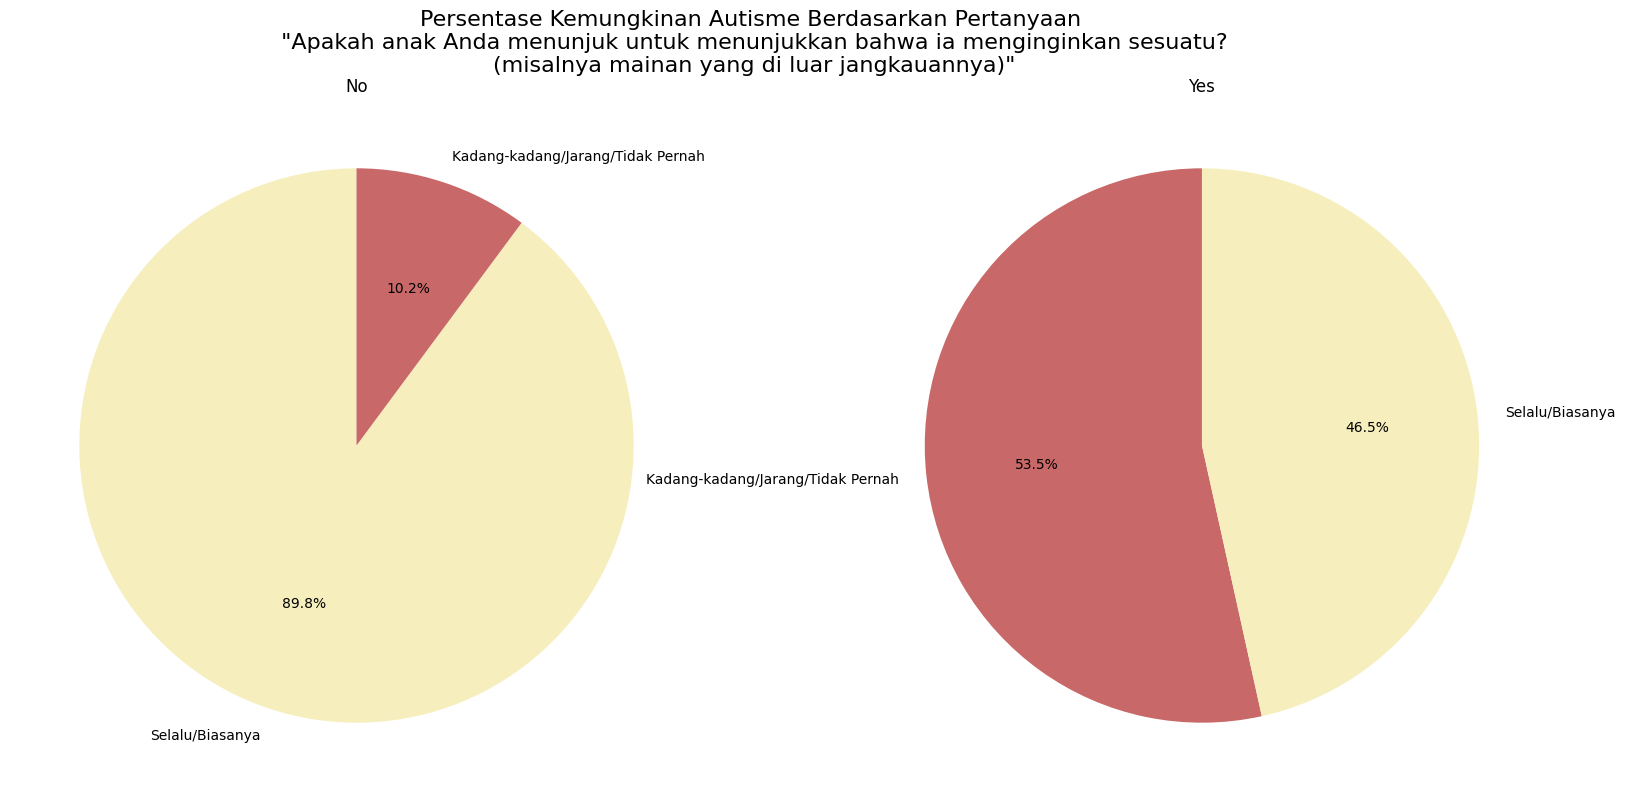

In [ ]:
asd_no = df_eda[df_eda['ASD Traits'] == 'No']['A3'].value_counts(normalize=True) * 100
asd_yes = df_eda[df_eda['ASD Traits'] == 'Yes']['A3'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(20, 9))

axs[0].pie(asd_no, labels=asd_no.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[0].set_title('No')

axs[1].pie(asd_yes, labels=asd_yes.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_yes.index], startangle=90)
axs[1].set_title('Yes')

plt.suptitle('Persentase Kemungkinan Autisme Berdasarkan Pertanyaan \n "Apakah anak Anda menunjuk untuk menunjukkan bahwa ia menginginkan sesuatu? \n(misalnya mainan yang di luar jangkauannya)"', fontsize=16)
plt.show()

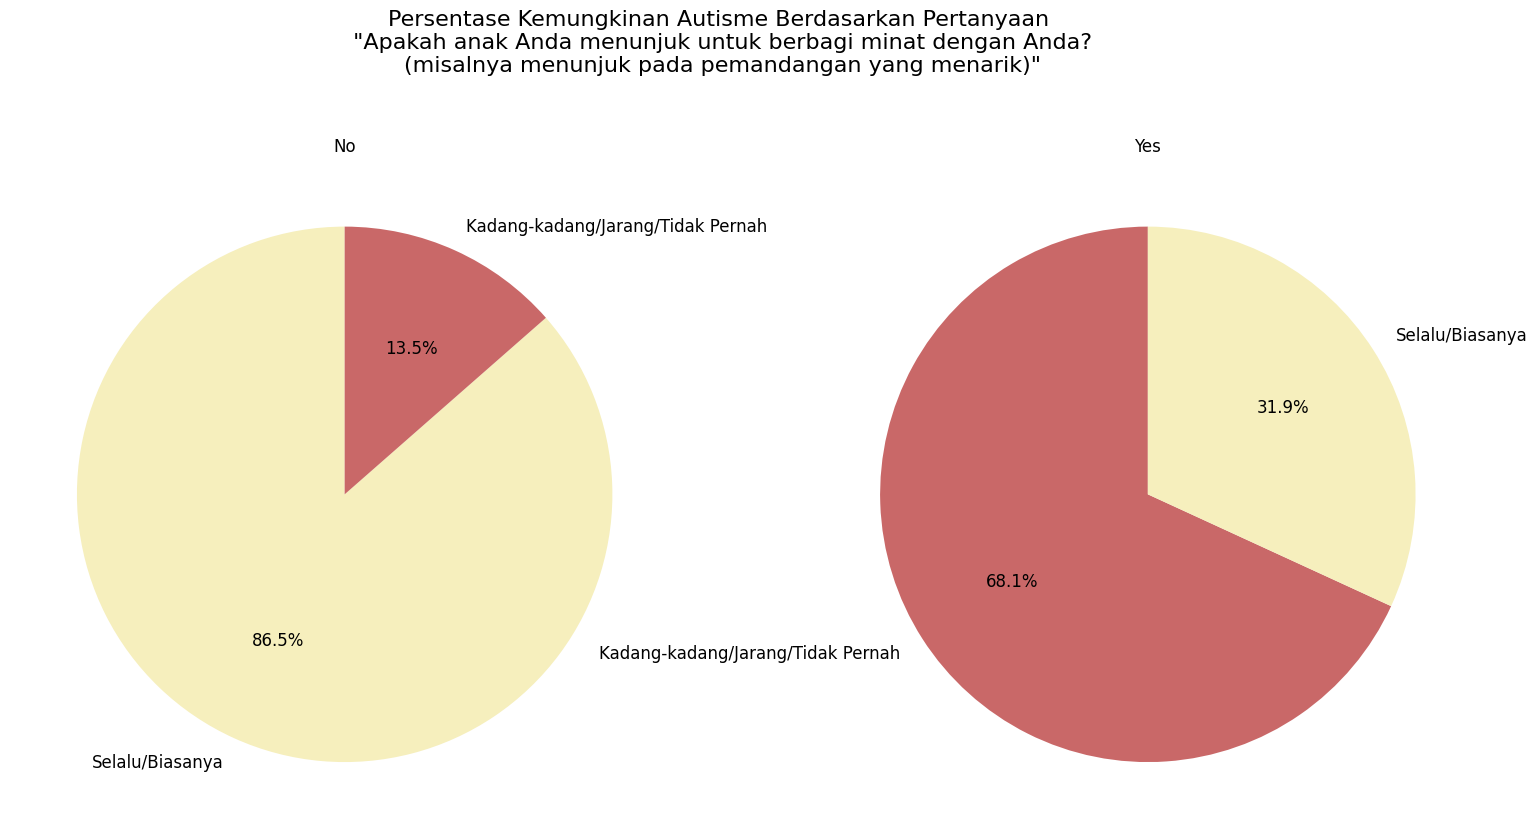

In [ ]:
asd_no = df_eda[df_eda['ASD Traits'] == 'No']['A4'].value_counts(normalize=True) * 100
asd_yes = df_eda[df_eda['ASD Traits'] == 'Yes']['A4'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(19, 10))

axs[0].pie(asd_no, labels=asd_no.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[0].set_title('No', fontsize=12)
for label in axs[0].texts:
    label.set_fontsize(12)

axs[1].pie(asd_yes, labels=asd_yes.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_yes.index], startangle=90)
axs[1].set_title('Yes', fontsize=12)
for label in axs[1].texts:
    label.set_fontsize(12)

plt.suptitle('Persentase Kemungkinan Autisme Berdasarkan Pertanyaan \n "Apakah anak Anda menunjuk untuk berbagi minat dengan Anda? \n(misalnya menunjuk pada pemandangan yang menarik)"', fontsize=16)
plt.show()

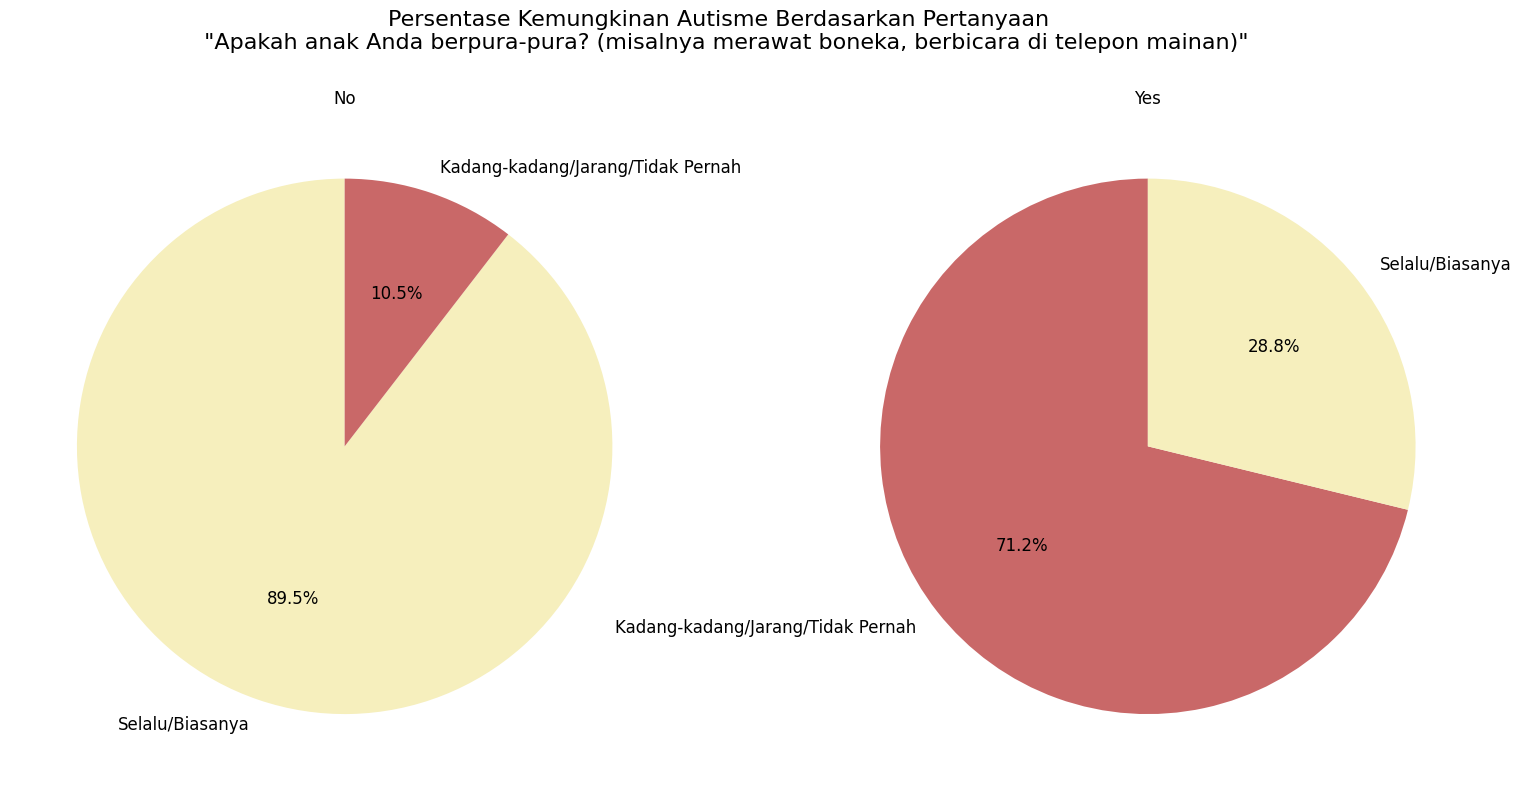

In [ ]:
asd_no = df_eda[df_eda['ASD Traits'] == 'No']['A5'].value_counts(normalize=True) * 100
asd_yes = df_eda[df_eda['ASD Traits'] == 'Yes']['A5'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(19, 9))

axs[0].pie(asd_no, labels=asd_no.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[0].set_title('No', fontsize=12)
for label in axs[0].texts:
    label.set_fontsize(12)

axs[1].pie(asd_yes, labels=asd_yes.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_yes.index], startangle=90)
axs[1].set_title('Yes', fontsize=12)
for label in axs[1].texts:
    label.set_fontsize(12)

plt.suptitle('Persentase Kemungkinan Autisme Berdasarkan Pertanyaan \n "Apakah anak Anda berpura-pura? (misalnya merawat boneka, berbicara di telepon mainan)"', fontsize=16)
plt.show()

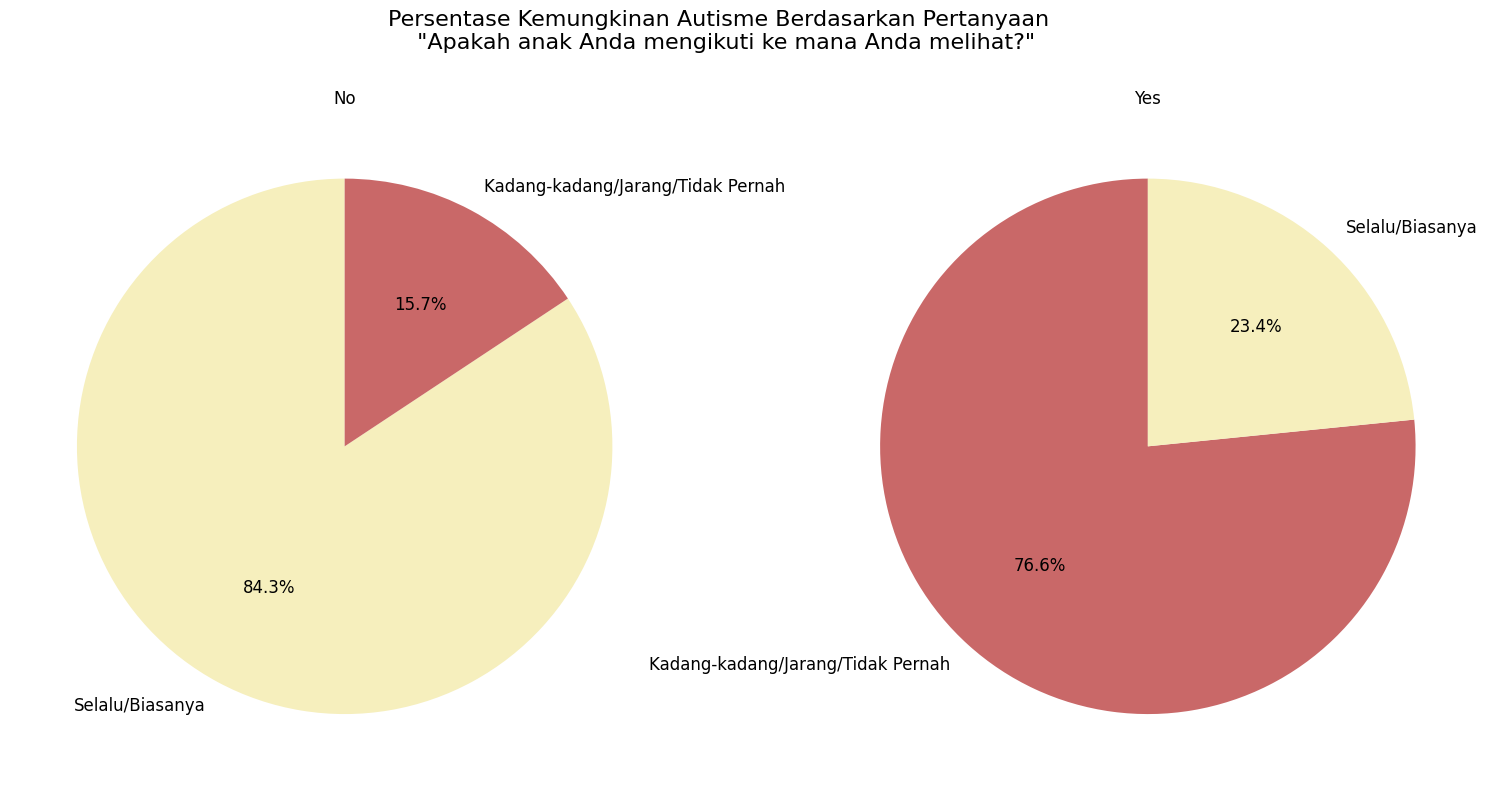

In [ ]:
asd_no = df_eda[df_eda['ASD Traits'] == 'No']['A6'].value_counts(normalize=True) * 100
asd_yes = df_eda[df_eda['ASD Traits'] == 'Yes']['A6'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(19, 9))

axs[0].pie(asd_no, labels=asd_no.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[0].set_title('No', fontsize=12)
for label in axs[0].texts:
    label.set_fontsize(12)

axs[1].pie(asd_yes, labels=asd_yes.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_yes.index], startangle=90)
axs[1].set_title('Yes', fontsize=12)
for label in axs[1].texts:
    label.set_fontsize(12)

plt.suptitle('Persentase Kemungkinan Autisme Berdasarkan Pertanyaan \n "Apakah anak Anda mengikuti ke mana Anda melihat?"', fontsize=16)
plt.show()

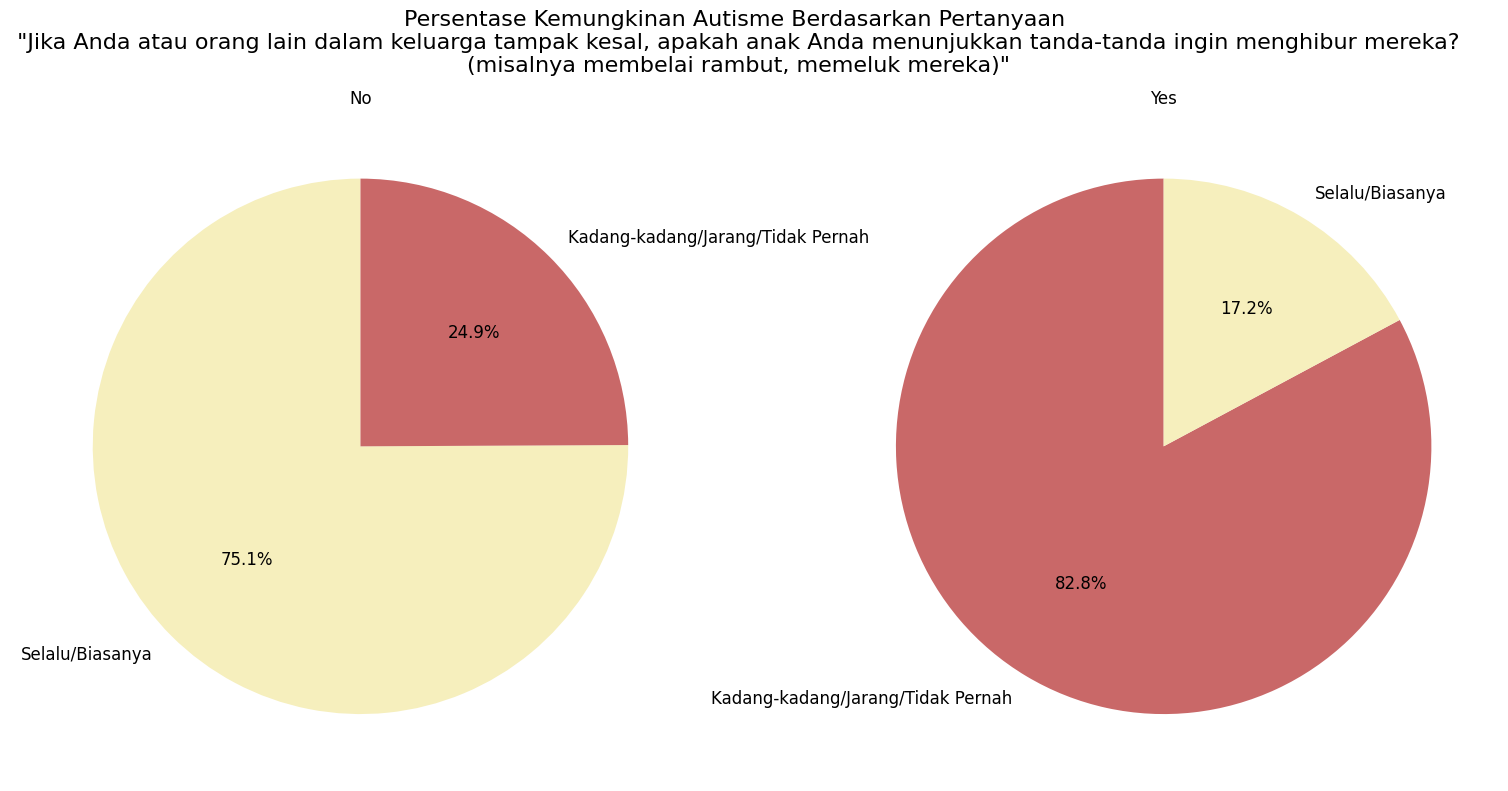

In [ ]:
asd_no = df_eda[df_eda['ASD Traits'] == 'No']['A7'].value_counts(normalize=True) * 100
asd_yes = df_eda[df_eda['ASD Traits'] == 'Yes']['A7'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(19, 9))

axs[0].pie(asd_no, labels=asd_no.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[0].set_title('No', fontsize=12)
for label in axs[0].texts:
    label.set_fontsize(12)

axs[1].pie(asd_yes, labels=asd_yes.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_yes.index], startangle=90)
axs[1].set_title('Yes', fontsize=12)
for label in axs[1].texts:
    label.set_fontsize(12)

plt.suptitle('Persentase Kemungkinan Autisme Berdasarkan Pertanyaan \n "Jika Anda atau orang lain dalam keluarga tampak kesal, apakah anak Anda menunjukkan tanda-tanda ingin menghibur mereka? \n(misalnya membelai rambut, memeluk mereka)"', fontsize=16)
plt.show()

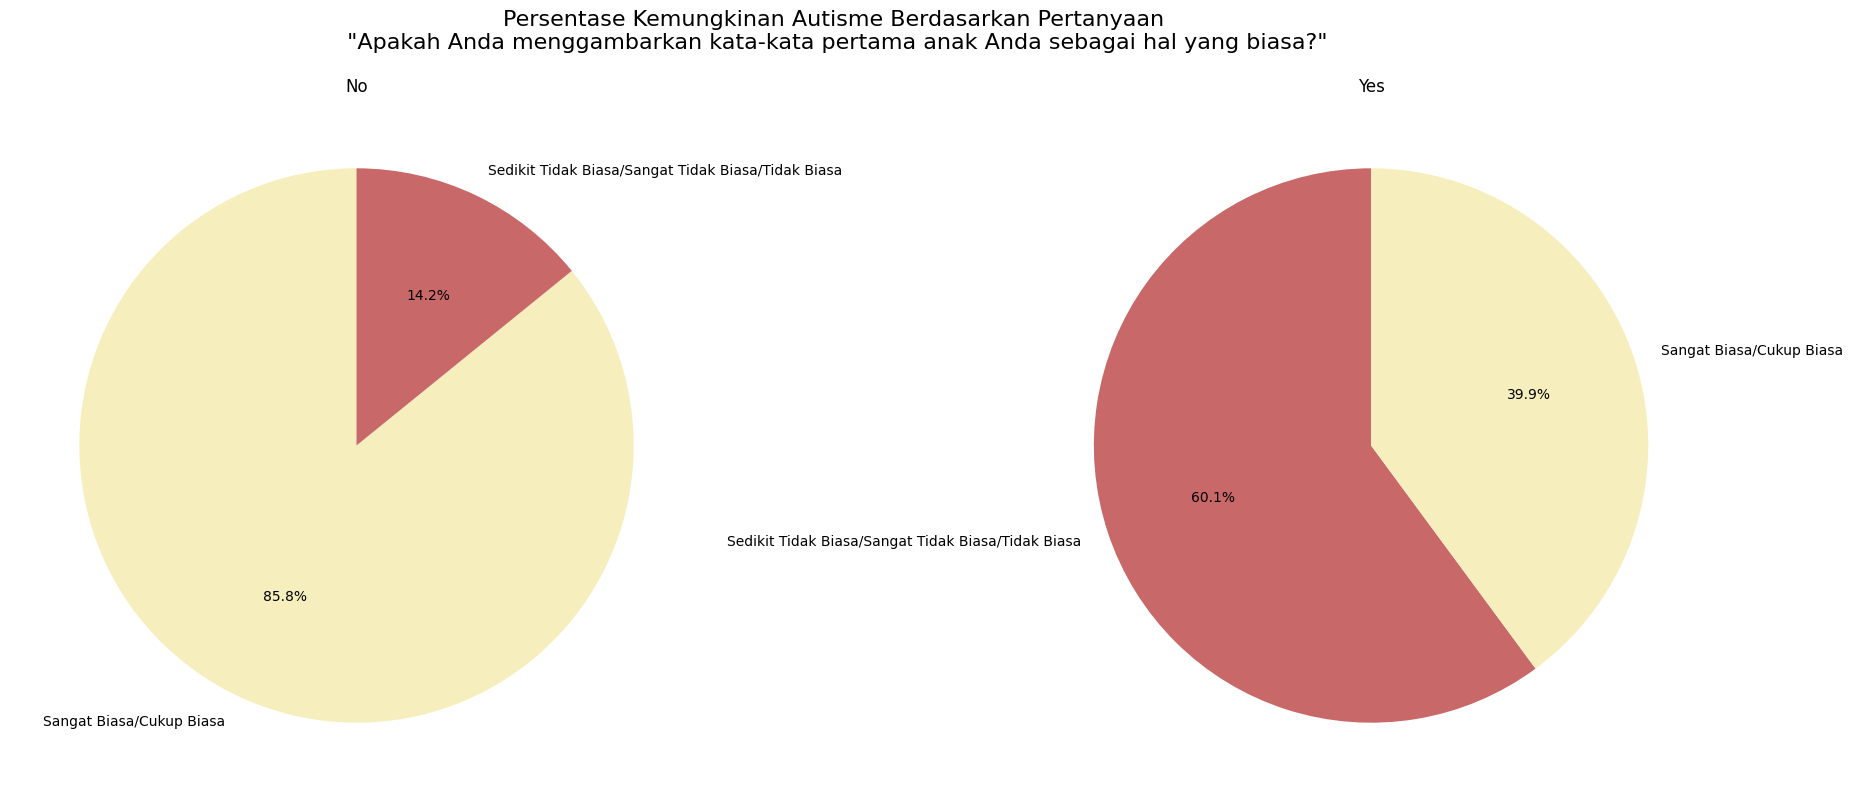

In [ ]:
asd_no = df_eda[df_eda['ASD Traits'] == 'No']['A8'].value_counts(normalize=True) * 100
asd_yes = df_eda[df_eda['ASD Traits'] == 'Yes']['A8'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(24, 9))

axs[0].pie(asd_no, labels=asd_no.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[0].set_title('No')

axs[1].pie(asd_yes, labels=asd_yes.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_yes.index], startangle=90)
axs[1].set_title('Yes')

plt.suptitle('Persentase Kemungkinan Autisme Berdasarkan Pertanyaan\n "Apakah Anda menggambarkan kata-kata pertama anak Anda sebagai hal yang biasa?"', fontsize=16)
plt.show()

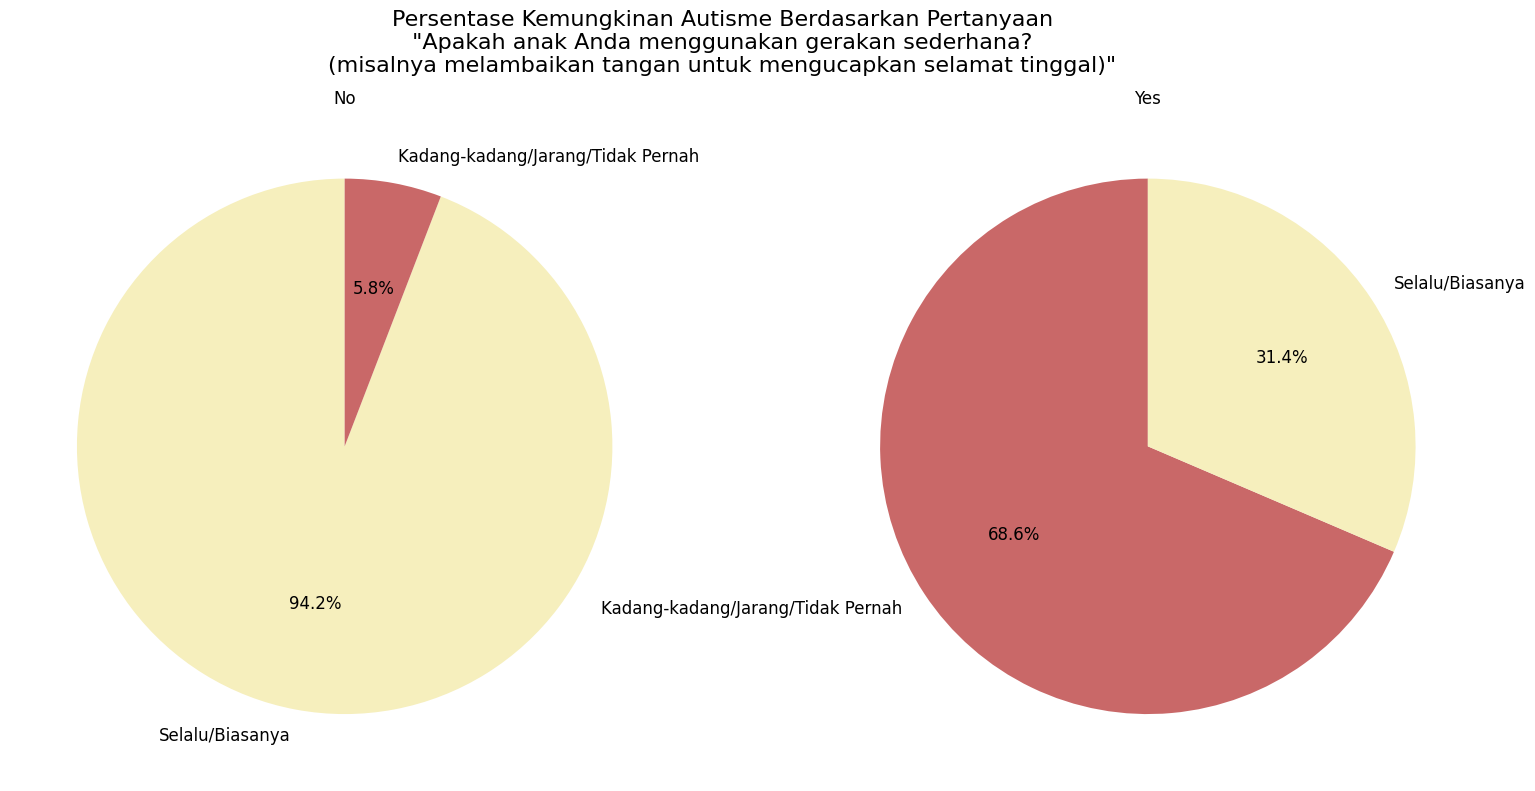

In [ ]:
asd_no = df_eda[df_eda['ASD Traits'] == 'No']['A9'].value_counts(normalize=True) * 100
asd_yes = df_eda[df_eda['ASD Traits'] == 'Yes']['A9'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(19, 9))

axs[0].pie(asd_no, labels=asd_no.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[0].set_title('No', fontsize=12)
for label in axs[0].texts:
    label.set_fontsize(12)

axs[1].pie(asd_yes, labels=asd_yes.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_yes.index], startangle=90)
axs[1].set_title('Yes', fontsize=12)
for label in axs[1].texts:
    label.set_fontsize(12)

plt.suptitle('Persentase Kemungkinan Autisme Berdasarkan Pertanyaan\n "Apakah anak Anda menggunakan gerakan sederhana? \n(misalnya melambaikan tangan untuk mengucapkan selamat tinggal)"', fontsize=16)
plt.show()

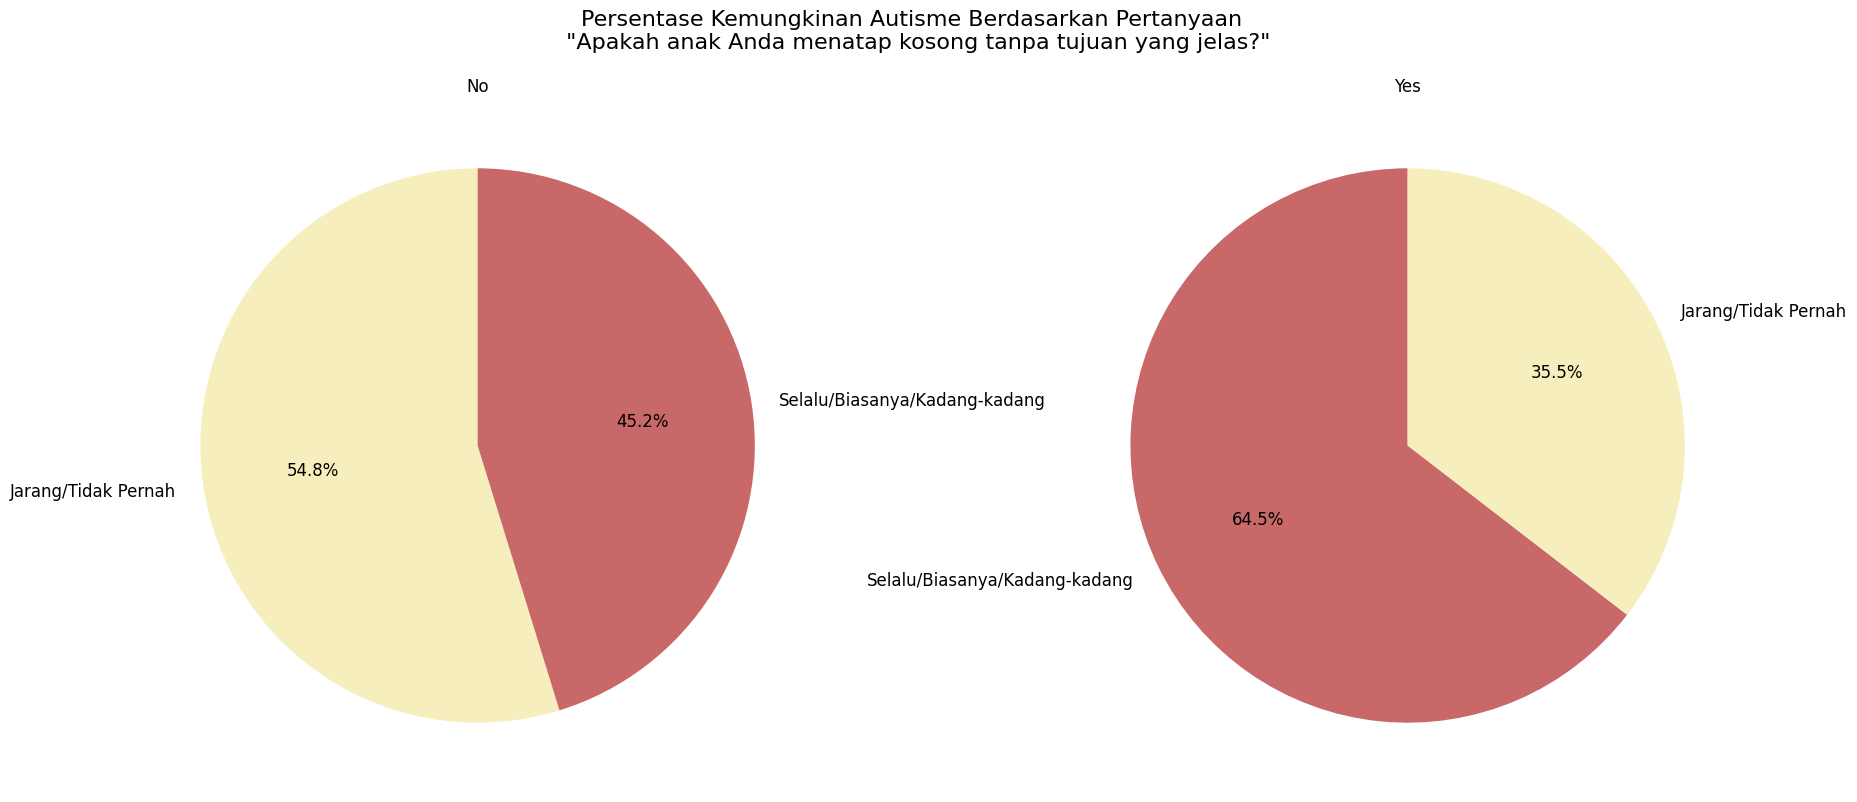

In [ ]:
asd_no = df_eda[df_eda['ASD Traits'] == 'No']['A10'].value_counts(normalize=True) * 100
asd_yes = df_eda[df_eda['ASD Traits'] == 'Yes']['A10'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(22, 9))

axs[0].pie(asd_no, labels=asd_no.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[0].set_title('No', fontsize=12)
for label in axs[0].texts:
    label.set_fontsize(12)

axs[1].pie(asd_yes, labels=asd_yes.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_yes.index], startangle=90)
axs[1].set_title('Yes', fontsize=12)
for label in axs[1].texts:
    label.set_fontsize(12)

plt.suptitle('Persentase Kemungkinan Autisme Berdasarkan Pertanyaan \n "Apakah anak Anda menatap kosong tanpa tujuan yang jelas?"', fontsize=16)
plt.show()

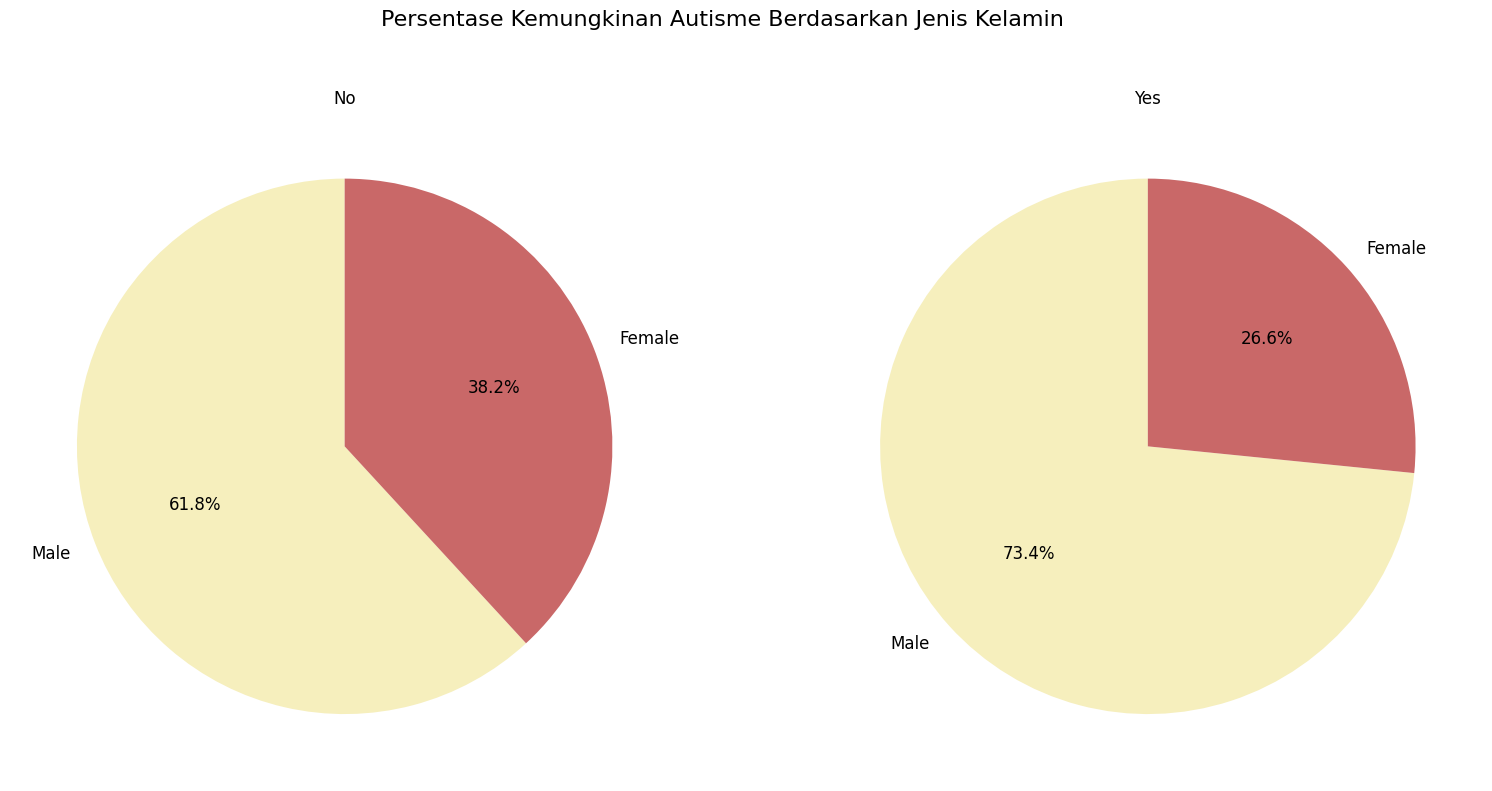

In [ ]:
asd_no = df_eda[df_eda['ASD Traits'] == 'No']['Sex'].value_counts(normalize=True) * 100
asd_yes = df_eda[df_eda['ASD Traits'] == 'Yes']['Sex'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(19, 9))

axs[0].pie(asd_no, labels=asd_no.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[0].set_title('No', fontsize=12)
for label in axs[0].texts:
    label.set_fontsize(12)

axs[1].pie(asd_yes, labels=asd_yes.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_yes.index], startangle=90)
axs[1].set_title('Yes', fontsize=12)
for label in axs[1].texts:
    label.set_fontsize(12)

plt.suptitle('Persentase Kemungkinan Autisme Berdasarkan Jenis Kelamin', fontsize=16)
plt.show()

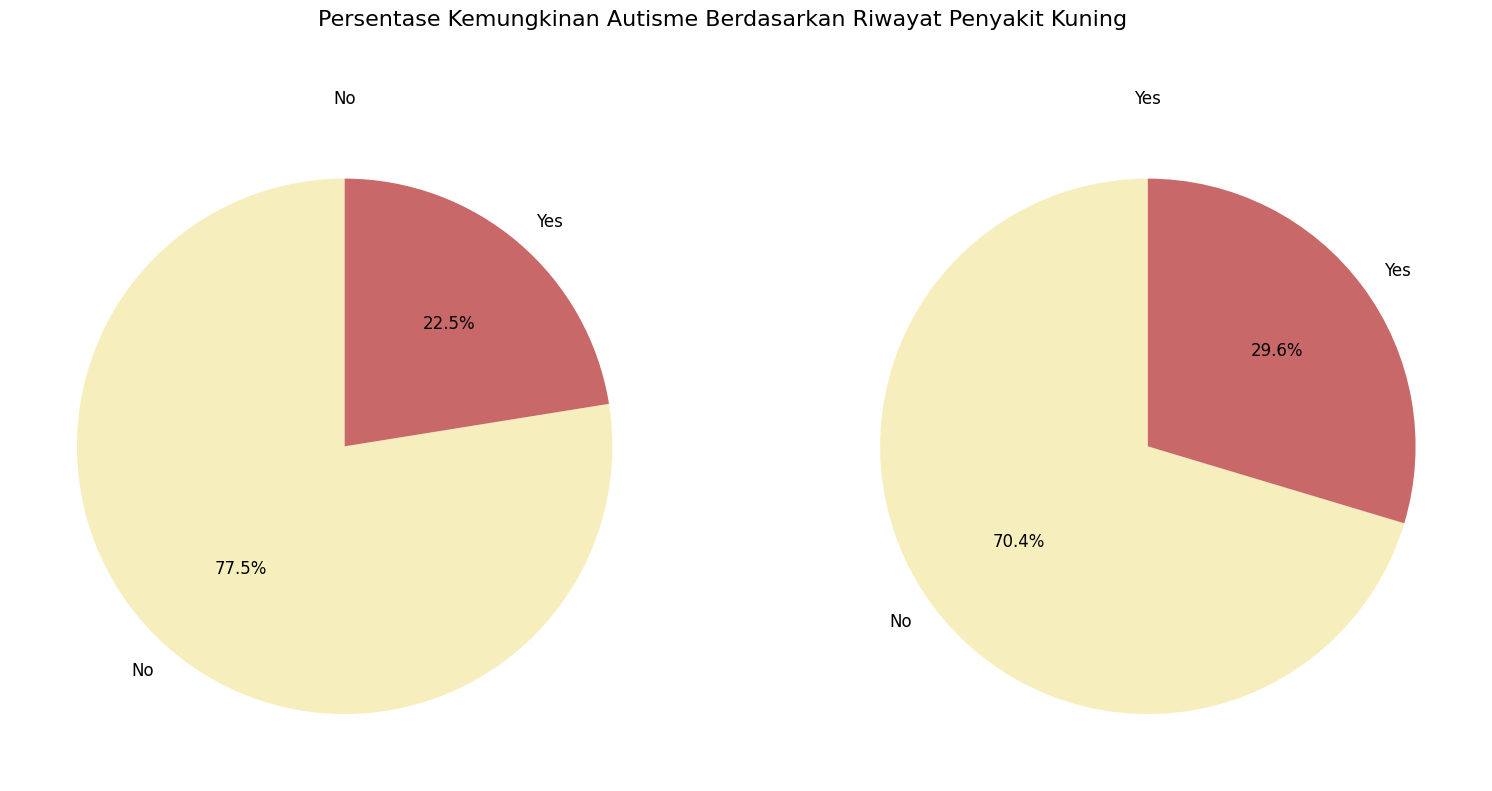

In [ ]:
asd_no = df_eda[df_eda['ASD Traits'] == 'No']['Jaundice'].value_counts(normalize=True) * 100
asd_yes = df_eda[df_eda['ASD Traits'] == 'Yes']['Jaundice'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(19, 9))

axs[0].pie(asd_no, labels=asd_no.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[0].set_title('No', fontsize=12)
for label in axs[0].texts:
    label.set_fontsize(12)

axs[1].pie(asd_yes, labels=asd_yes.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_yes.index], startangle=90)
axs[1].set_title('Yes', fontsize=12)
for label in axs[1].texts:
    label.set_fontsize(12)

plt.suptitle('Persentase Kemungkinan Autisme Berdasarkan Riwayat Penyakit Kuning', fontsize=16)
plt.show()

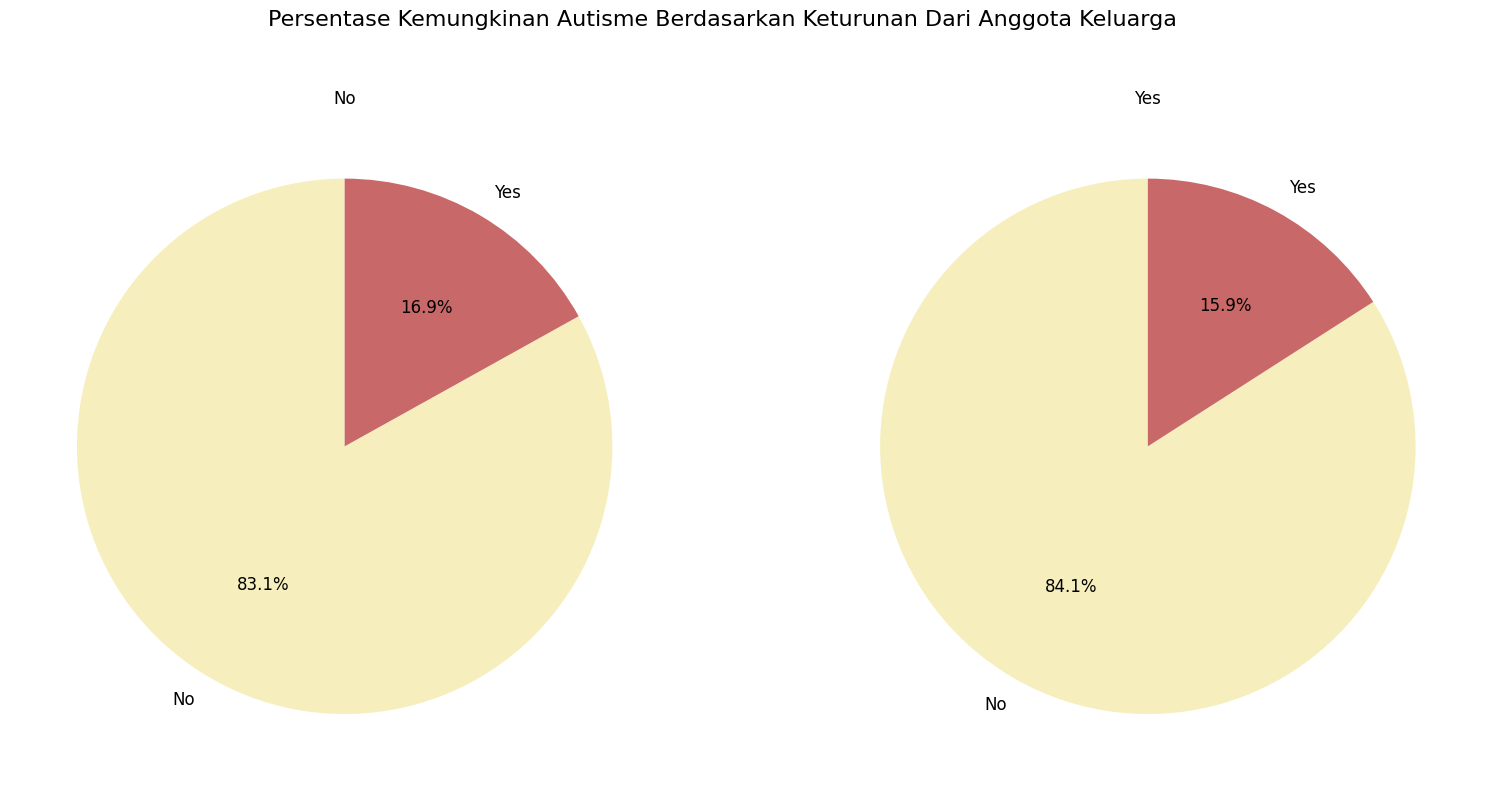

In [ ]:
asd_no = df_eda[df_eda['ASD Traits'] == 'No']['Family_mem_with_ASD'].value_counts(normalize=True) * 100
asd_yes = df_eda[df_eda['ASD Traits'] == 'Yes']['Family_mem_with_ASD'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(19, 9))

axs[0].pie(asd_no, labels=asd_no.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[0].set_title('No', fontsize=12)
for label in axs[0].texts:
    label.set_fontsize(12)

axs[1].pie(asd_yes, labels=asd_yes.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_yes.index], startangle=90)
axs[1].set_title('Yes', fontsize=12)
for label in axs[1].texts:
    label.set_fontsize(12)

plt.suptitle('Persentase Kemungkinan Autisme Berdasarkan Keturunan Dari Anggota Keluarga', fontsize=16)
plt.show()

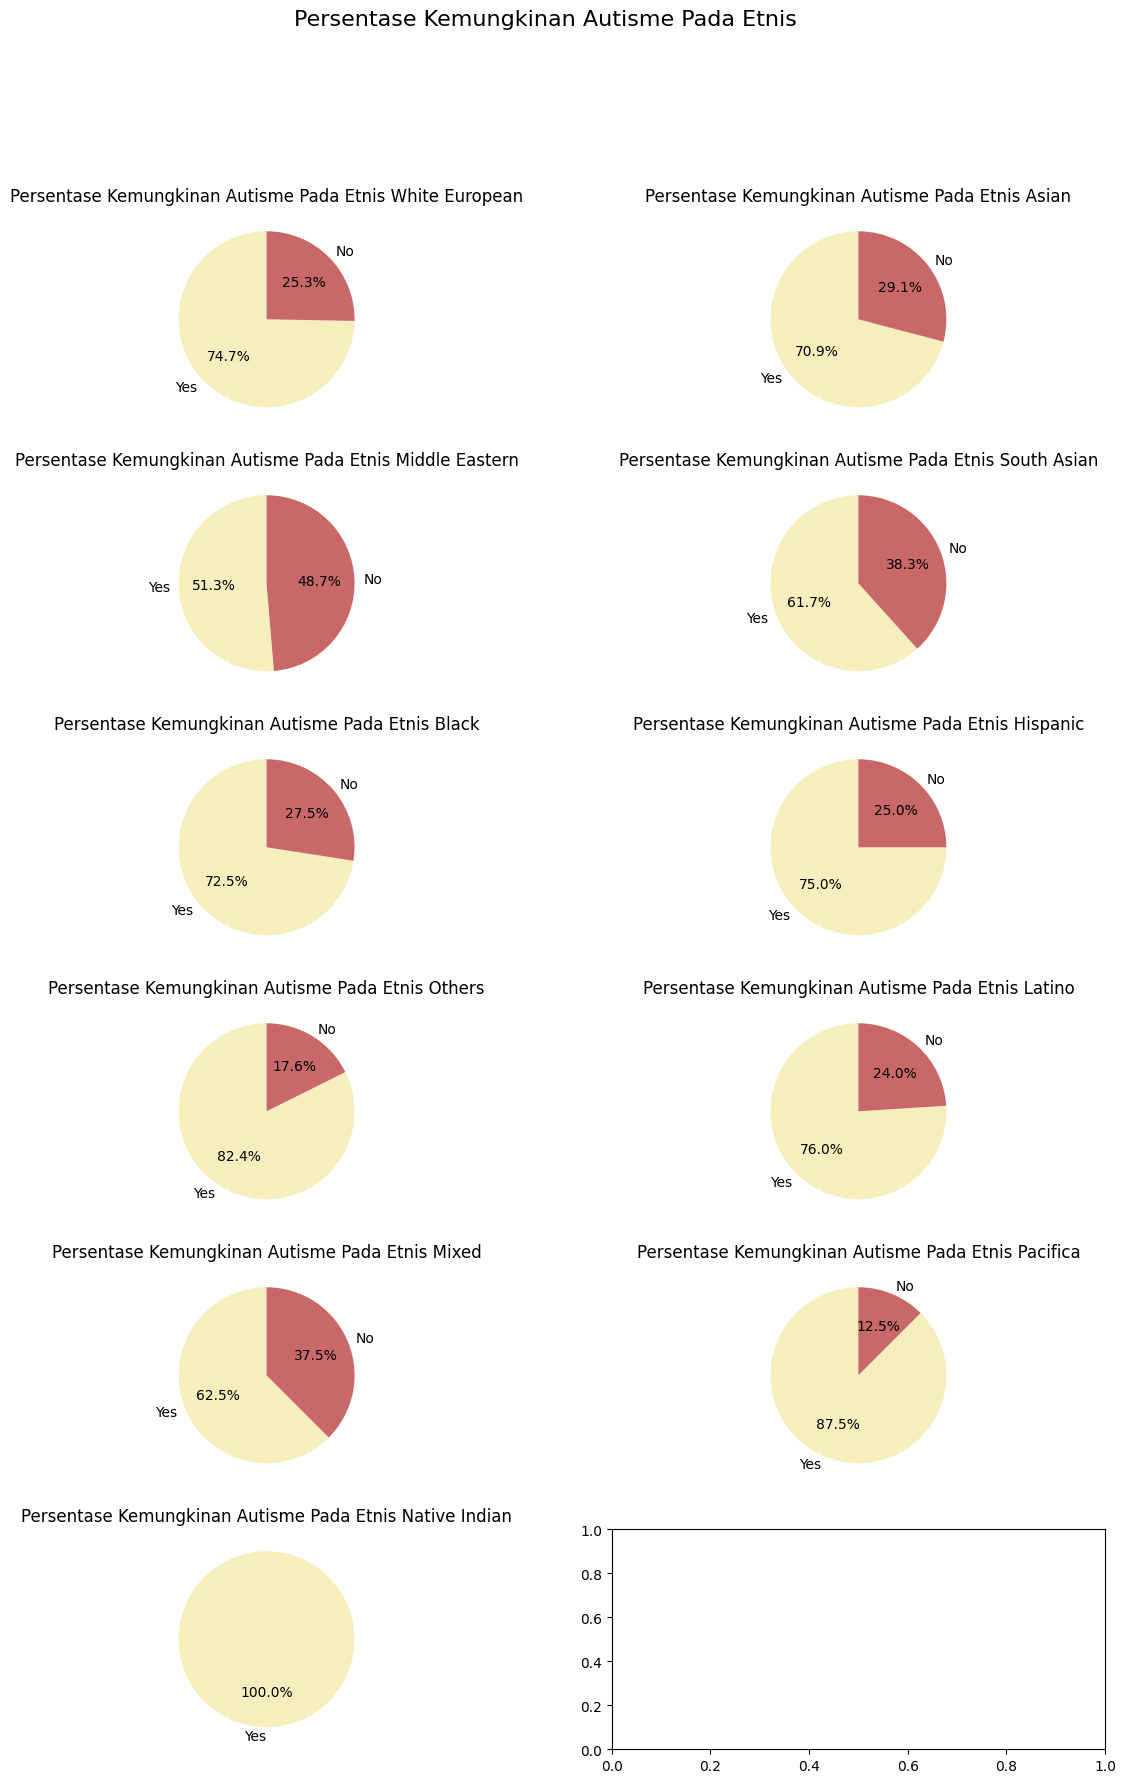

In [ ]:
we = df_eda[df_eda['Ethnicity'] == 'White European']['ASD Traits'].value_counts(normalize=True) * 100
asian = df_eda[df_eda['Ethnicity'] == 'asian']['ASD Traits'].value_counts(normalize=True) * 100
me = df_eda[df_eda['Ethnicity'] == 'middle eastern']['ASD Traits'].value_counts(normalize=True) * 100
sa = df_eda[df_eda['Ethnicity'] == 'south asian']['ASD Traits'].value_counts(normalize=True) * 100
black = df_eda[df_eda['Ethnicity'] == 'black']['ASD Traits'].value_counts(normalize=True) * 100
hispanic = df_eda[df_eda['Ethnicity'] == 'Hispanic']['ASD Traits'].value_counts(normalize=True) * 100
others = df_eda[df_eda['Ethnicity'] == 'Others']['ASD Traits'].value_counts(normalize=True) * 100
latino = df_eda[df_eda['Ethnicity'] == 'Latino']['ASD Traits'].value_counts(normalize=True) * 100
mixed = df_eda[df_eda['Ethnicity'] == 'mixed']['ASD Traits'].value_counts(normalize=True) * 100
pacifica = df_eda[df_eda['Ethnicity'] == 'Pacifica']['ASD Traits'].value_counts(normalize=True) * 100
na = df_eda[df_eda['Ethnicity'] == 'Native Indian']['ASD Traits'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(6, 2, figsize=(14, 20))

axs[0, 0].pie(we, labels=we.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[0, 0].set_title('Persentase Kemungkinan Autisme Pada Etnis White European')

axs[0, 1].pie(asian, labels=asian.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[0, 1].set_title('Persentase Kemungkinan Autisme Pada Etnis Asian')

axs[1, 0].pie(me, labels=me.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[1, 0].set_title('Persentase Kemungkinan Autisme Pada Etnis Middle Eastern')

axs[1, 1].pie(sa, labels=sa.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[1, 1].set_title('Persentase Kemungkinan Autisme Pada Etnis South Asian')

axs[2, 0].pie(black, labels=black.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[2, 0].set_title('Persentase Kemungkinan Autisme Pada Etnis Black')

axs[2, 1].pie(hispanic, labels=hispanic.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[2, 1].set_title('Persentase Kemungkinan Autisme Pada Etnis Hispanic')

axs[3, 0].pie(others, labels=others.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[3, 0].set_title('Persentase Kemungkinan Autisme Pada Etnis Others')

axs[3, 1].pie(latino, labels=latino.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[3, 1].set_title('Persentase Kemungkinan Autisme Pada Etnis Latino')

axs[4, 0].pie(mixed, labels=mixed.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[4, 0].set_title('Persentase Kemungkinan Autisme Pada Etnis Mixed')

axs[4, 1].pie(pacifica, labels=pacifica.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[4, 1].set_title('Persentase Kemungkinan Autisme Pada Etnis Pacifica')

axs[5, 0].pie(na, labels=na.index, autopct='%1.1f%%', colors=[palette[label] for label in asd_no.index], startangle=90)
axs[5, 0].set_title('Persentase Kemungkinan Autisme Pada Etnis Native Indian')

plt.suptitle('Persentase Kemungkinan Autisme Pada Etnis', fontsize=16)
plt.show()

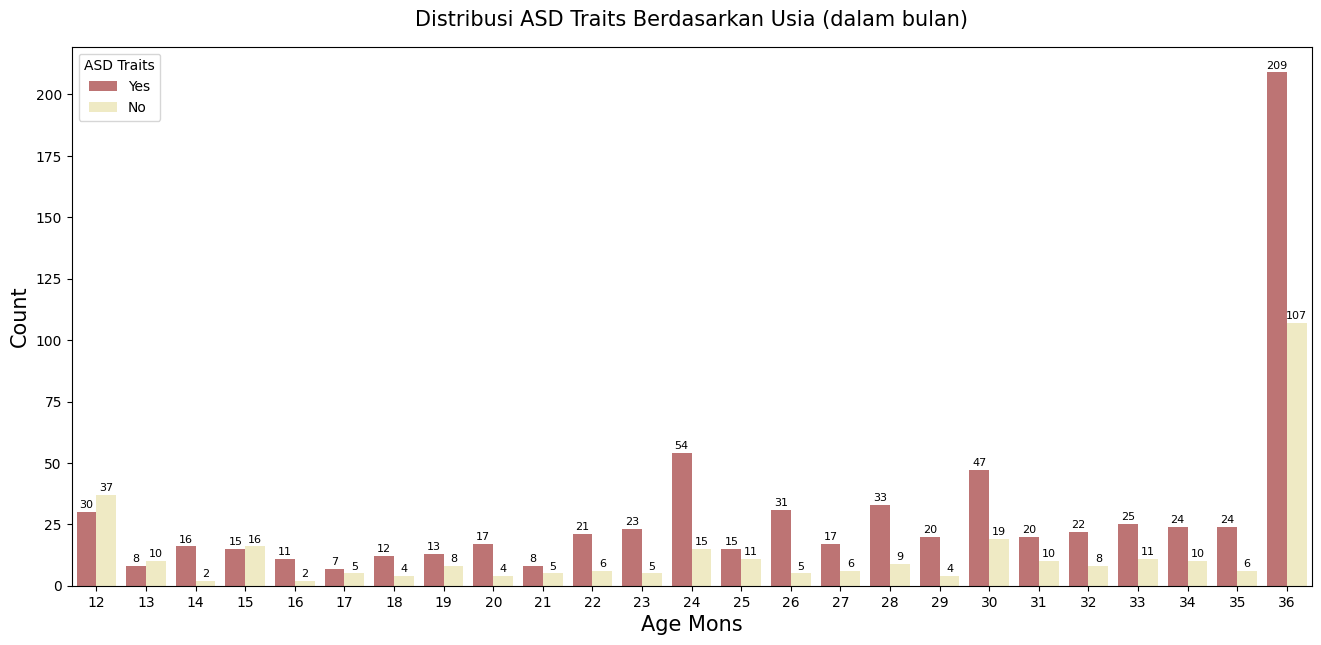

In [ ]:
fig, axs = plt.subplots(figsize=(16, 7))

ax_view = sns.countplot(x="Age_Mons", hue="ASD Traits", data=df_eda, palette=palette, ax=axs)

for bar in ax_view.patches:
    height = int(bar.get_height())
    if height > 0:
        ax_view.annotate(f'{height}',
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='center', fontsize=8, color='black',
                         xytext=(0, 5), textcoords='offset points')

axs.set_title('Distribusi ASD Traits Berdasarkan Usia (dalam bulan)', fontsize=15, pad=15)
axs.set_ylabel('Count', fontsize=15)
axs.set_xlabel('Age Mons', fontsize=15)
axs.legend(title='ASD Traits', fontsize=15, prop={'size': 10})

plt.show()

#Modeling

Pemodelan dilakukan dengan hanya menggunaan atribut A1-10, Age Mons, serta ASD Traits. Pemilihan atribut ini didasarkan pada korelasi terhadap atribut target.

(Dapat dilihat contohnya pada EDA bagian Sex dan Family member with ASD, atribut tersebut tidak menjadi faktor untuk ASD Traits)

<ipython-input-137-915f0566d617>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_view = sns.countplot(x="ASD Traits", data=df, palette=palettes, ax=axs)


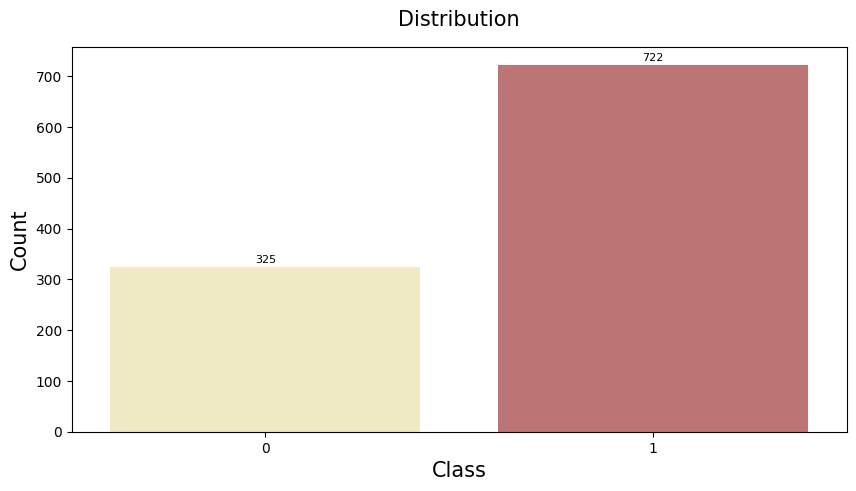

In [ ]:
fig, axs = plt.subplots(figsize=(10, 5))

ax_view = sns.countplot(x="ASD Traits", data=df, palette=palettes, ax=axs)

for bar in ax_view.patches:
    height = int(bar.get_height())
    if height > 0:
        ax_view.annotate(f'{height}',
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='center', fontsize=8, color='black',
                         xytext=(0, 5), textcoords='offset points')

axs.set_title('Distribution', fontsize=15, pad=15)
axs.set_ylabel('Count', fontsize=15)
axs.set_xlabel('Class', fontsize=15)

plt.show()

In [ ]:
X = df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
        'Age_Mons']]
y = df['ASD Traits']

In [ ]:
smote_os = SMOTE(random_state = 42)
X_resampled, y_resampled = smote_os.fit_resample(X, y)

<ipython-input-140-e8ec942269a5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_view = sns.countplot(x="ASD Traits", data=y_resampled_df, palette=palettes, ax=axs)


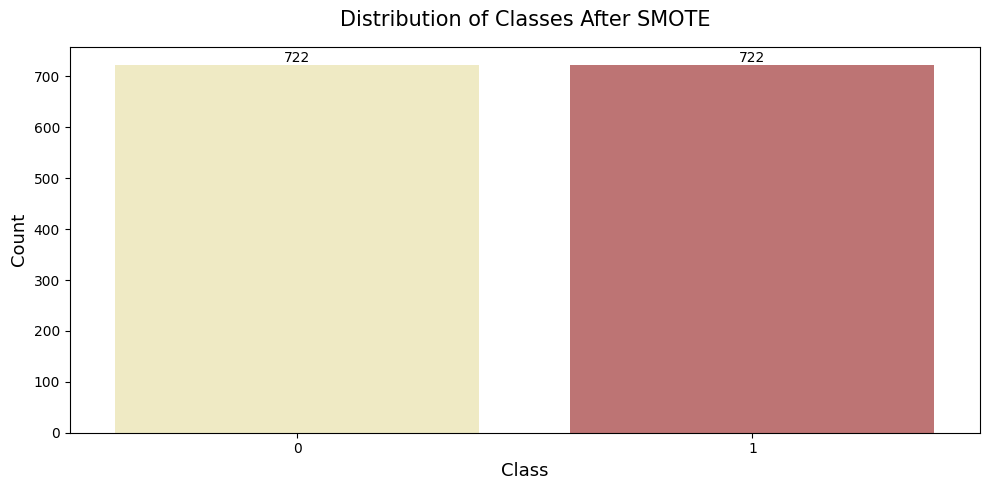

In [ ]:
y_resampled_df = pd.DataFrame(y_resampled, columns=['ASD Traits'])

fig, axs = plt.subplots(figsize=(10, 5))

ax_view = sns.countplot(x="ASD Traits", data=y_resampled_df, palette=palettes, ax=axs)

for bar in ax_view.patches:
    height = int(bar.get_height())
    if height > 0:
        ax_view.annotate(f'{height}',
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='center', fontsize=10, color='black',
                         xytext=(0, 5), textcoords='offset points')

axs.set_title('Distribution of Classes After SMOTE', fontsize=15, pad=15)
axs.set_xlabel('Class', fontsize=13)
axs.set_ylabel('Count', fontsize=13)

plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [ ]:
# Pemodelan menggunakan Decision Tree
dt_model = DecisionTreeClassifier(max_depth=4)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [ ]:
# Actual target values
actual = y_test

# Membuat confusion matrix dari setiap model
dt_cm = confusion_matrix(actual, dt_pred)

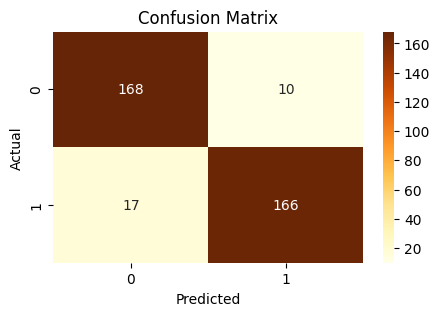

In [ ]:
plt.figure(figsize=(5, 3))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def evaluate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return cm, accuracy, precision, recall, f1

In [ ]:
dt_cm, dt_accuracy, dt_precision, dt_recall, dt_f1 = evaluate(y_test, dt_pred)

In [ ]:
acc_models = pd.DataFrame({
    'Accuracy': [dt_accuracy],
    'Precision': [dt_precision],
    'Recall': [dt_recall],
    'F1_Score': [dt_f1]
    })

acc_models

,Accuracy,Precision,Recall,F1_Score
0,0.925208,0.943182,0.907104,0.924791


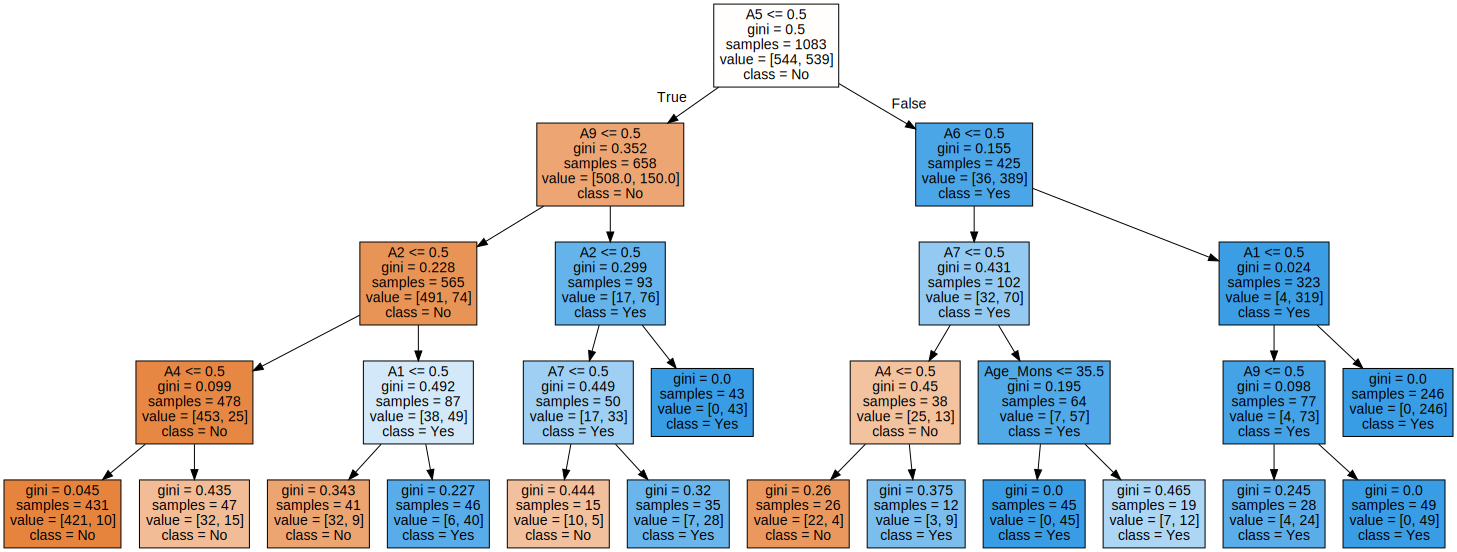

In [ ]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(dt_model, out_file=None,
                                feature_names=X.columns,
                                class_names=['No', "Yes"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree", format="png", cleanup=True)
graph

In [ ]:
from sklearn.tree import _tree

def get_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    rules = []

    def recurse(node, depth, rule=""):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            left_rule = f"{rule} ( {name} <= {threshold:.2f} )"
            right_rule = f"{rule} ( {name} > {threshold:.2f} )"
            recurse(tree_.children_left[node], depth + 1, left_rule)
            recurse(tree_.children_right[node], depth + 1, right_rule)
        else:
            value = tree_.value[node]
            rule += f" => Class {value.argmax()}"
            rules.append(rule)

    recurse(0, 1)
    return rules

In [ ]:
# Ekstraksi aturan
rules = get_rules(dt_model, X_train.columns)

# Cetak aturan
for idx, rule in enumerate(rules, 1):
    print(f"Rule {idx}: {rule}")

Rule 1:  ( A5 <= 0.50 ) ( A9 <= 0.50 ) ( A2 <= 0.50 ) ( A4 <= 0.50 ) => Class 0
Rule 2:  ( A5 <= 0.50 ) ( A9 <= 0.50 ) ( A2 <= 0.50 ) ( A4 > 0.50 ) => Class 0
Rule 3:  ( A5 <= 0.50 ) ( A9 <= 0.50 ) ( A2 > 0.50 ) ( A1 <= 0.50 ) => Class 0
Rule 4:  ( A5 <= 0.50 ) ( A9 <= 0.50 ) ( A2 > 0.50 ) ( A1 > 0.50 ) => Class 1
Rule 5:  ( A5 <= 0.50 ) ( A9 > 0.50 ) ( A2 <= 0.50 ) ( A7 <= 0.50 ) => Class 0
Rule 6:  ( A5 <= 0.50 ) ( A9 > 0.50 ) ( A2 <= 0.50 ) ( A7 > 0.50 ) => Class 1
Rule 7:  ( A5 <= 0.50 ) ( A9 > 0.50 ) ( A2 > 0.50 ) => Class 1
Rule 8:  ( A5 > 0.50 ) ( A6 <= 0.50 ) ( A7 <= 0.50 ) ( A4 <= 0.50 ) => Class 0
Rule 9:  ( A5 > 0.50 ) ( A6 <= 0.50 ) ( A7 <= 0.50 ) ( A4 > 0.50 ) => Class 1
Rule 10:  ( A5 > 0.50 ) ( A6 <= 0.50 ) ( A7 > 0.50 ) ( Age_Mons <= 35.50 ) => Class 1
Rule 11:  ( A5 > 0.50 ) ( A6 <= 0.50 ) ( A7 > 0.50 ) ( Age_Mons > 35.50 ) => Class 1
Rule 12:  ( A5 > 0.50 ) ( A6 > 0.50 ) ( A1 <= 0.50 ) ( A9 <= 0.50 ) => Class 1
Rule 13:  ( A5 > 0.50 ) ( A6 > 0.50 ) ( A1 <= 0.50 ) ( A9

In [ ]:
dt_feature_importance = dt_model.feature_importances_
feature_names = X.columns
dt_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': dt_feature_importance})
dt_feature_importance_df = dt_feature_importance_df.sort_values(by='Importance', ascending=False)
dt_feature_importance_df

,Feature,Importance
4,A5,0.564488
8,A9,0.175696
1,A2,0.101274
6,A7,0.043777
0,A1,0.043122
5,A6,0.032574
3,A4,0.030678
10,Age_Mons,0.008391
2,A3,0.000000
7,A8,0.000000
